1. **Defining the question**
 
 The main purpose of this analysis is to identify which individuals are most likely to have or use a bank account

Loading the required libraries

In [260]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import chi2
import sklearn.linear_model as sk
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve

Loading the dataset

In [225]:
# Loading the dataset
df = pd.read_csv('/content/Financial Dataset - 1.csv')

In [129]:
# Checking the shape of the data
df.shape

(23524, 13)

In [130]:
# Viewing the top values of the data
df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [226]:
# Dropping unnecesary columns
# Other columns will be dropped at a later stage
df = df.drop(['uniqueid'], axis=1)

In [133]:
# Previewing the data
df.head()

,country,year,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [134]:
# Viewing the bottom values of the dataset
df.tail()

,country,year,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [135]:
# Checking the general information of the data
df.describe(include='all')

,country,year,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
count,23510,23524.000000,23488,23509,23513,23496.000000,23490.000000,23490,23520,23492,23495,23494
unique,4,NaN,2,2,2,NaN,NaN,2,6,5,7,10
top,Rwanda,NaN,No,Rural,Yes,NaN,NaN,Female,Head of Household,Married/Living together,Primary education,Self employed
freq,8735,NaN,20179,14338,17449,NaN,NaN,13859,12829,10739,12775,6428
mean,NaN,2016.979000,NaN,NaN,NaN,3.681818,38.804300,NaN,NaN,NaN,NaN,NaN
std,NaN,0.899669,NaN,NaN,NaN,2.279933,16.519996,NaN,NaN,NaN,NaN,NaN
min,NaN,2016.000000,NaN,NaN,NaN,0.000000,16.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,2016.000000,NaN,NaN,NaN,2.000000,26.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,2017.000000,NaN,NaN,NaN,3.000000,35.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,2018.000000,NaN,NaN,NaN,5.000000,49.000000,NaN,NaN,NaN,NaN,NaN


In [136]:
# Confirming the correctness of the data types within the dataframe
df.dtypes

country                    object
year                        int64
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

In [227]:
# Cleaning column headers
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [138]:
# Checking for missing values
df.isnull().sum()

country                   14
year                       0
has_a_bank_account        36
type_of_location          15
cell_phone_access         11
household_size            28
respondent_age            34
gender_of_respondent      34
the_relathip_with_head     4
marital_status            32
level_of_educuation       29
type_of_job               30
dtype: int64

In [139]:
# Removing duplicate values
df = df.drop_duplicates()

In [140]:
# Checking if there is any change after dropping duplicates
df.shape

(19151, 12)

**2. UNIVARIATE ANALYSIS**

*country column*

In [141]:
# Country participating in the survey summary
df.country.value_counts()

Rwanda      6699
Kenya       5617
Tanzania    4846
Uganda      1975
Name: country, dtype: int64

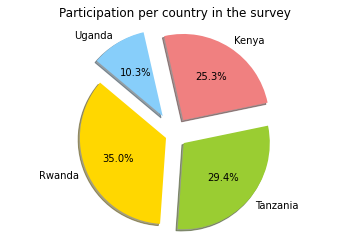

In [142]:
# Visualizing the counts using a pie chart
x = list(df.country.value_counts())
labels = ['Rwanda','Tanzania','Kenya','Uganda']
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0.15, 0.2, 0.25)
plt.pie(x, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('Participation per country in the survey')
plt.show()

**Findings**

There were more respondents in Rwanda than in Kenya for the study

*Year*

In [143]:
# Looking at the years
df.year.unique()

array([2018, 2029, 2056, 2016, 2039, 2017])

In [144]:
# Clearly there are entries that have not been encoded correctly
df.year.value_counts()

2018    7590
2016    6698
2017    4860
2029       1
2056       1
2039       1
Name: year, dtype: int64

In [145]:
# # Since they are only three which is negligible we can redistribute them back uniformly over the remaining years
df['year'] = df['year'].replace([2029,2056,2039],[2017,2016,2018])

In [146]:
# font dictinary
title = {'family': 'comic','color':  'darkred','weight': 'normal','size': 14}
others = {'family': 'comic','color':  'blue','weight': 'normal','size': 10}

Text(0, 0.5, 'Count')

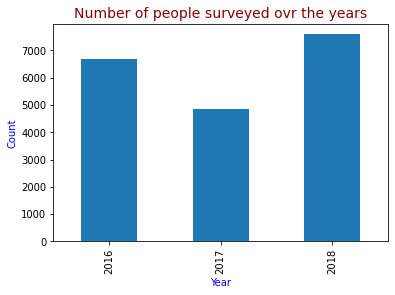

In [147]:
# Number of participants over the years
df['year'].value_counts().sort_index().plot.bar()
plt.title('Number of people surveyed ovr the years', fontdict=title)
plt.xlabel('Year', fontdict=others)
plt.ylabel('Count', fontdict=others)

*has_a_bank_account column*

In [148]:
# Looking at the has_a_bank_account column
df.has_a_bank_account.value_counts()

No     15971
Yes     3144
Name: has_a_bank_account, dtype: int64

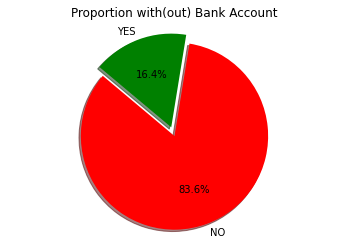

In [149]:
# Visualising proportion of the bank and unbanked population
x = list(df.has_a_bank_account.value_counts())
labels = ['NO','YES']
colors = ['red', 'green']
explode = (0.1, 0)
plt.pie(x, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('Proportion with(out) Bank Account')
plt.show()

Text(0, 0.5, 'Count')

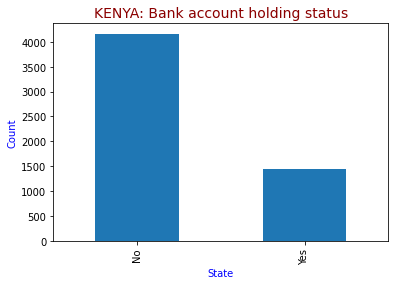

In [150]:
# Visualization per country
# KENYA
df[df.country == 'Kenya']['has_a_bank_account'].value_counts().plot.bar()
plt.title('KENYA: Bank account holding status', fontdict=title)
plt.xlabel('State', fontdict=others)
plt.ylabel('Count', fontdict=others)

Text(0, 0.5, 'Count')

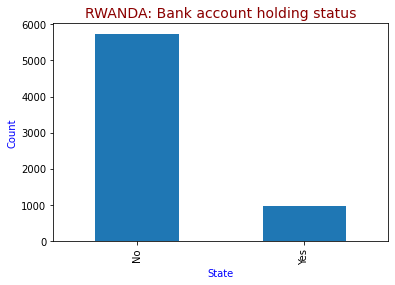

In [151]:
# RWANDA
df[df.country == 'Rwanda']['has_a_bank_account'].value_counts().plot.bar()
plt.title('RWANDA: Bank account holding status', fontdict=title)
plt.xlabel('State', fontdict=others)
plt.ylabel('Count', fontdict=others)

Text(0, 0.5, 'Count')

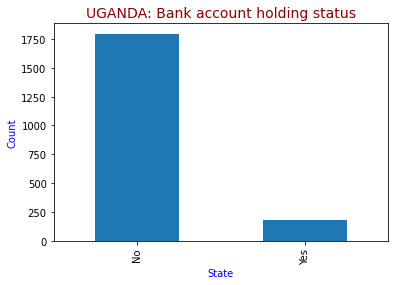

In [152]:
# UGANDA
df[df.country == 'Uganda']['has_a_bank_account'].value_counts().plot.bar()
plt.title('UGANDA: Bank account holding status', fontdict=title)
plt.xlabel('State', fontdict=others)
plt.ylabel('Count', fontdict=others)

Text(0, 0.5, 'Count')

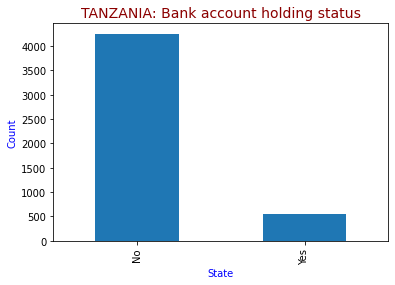

In [153]:
# TANZANIA
df[df.country == 'Tanzania']['has_a_bank_account'].value_counts().plot.bar()
plt.title('TANZANIA: Bank account holding status', fontdict=title)
plt.xlabel('State', fontdict=others)
plt.ylabel('Count', fontdict=others)

**Findings**

Most of the respondents are NOT formally banked **(85.9%)**

Country level reveal the same

*type_of_location column*

In [154]:
# Looking at the location
df.type_of_location.value_counts()

Rural    11744
Urban     7392
Name: type_of_location, dtype: int64

Text(0, 0.5, 'COUNT')

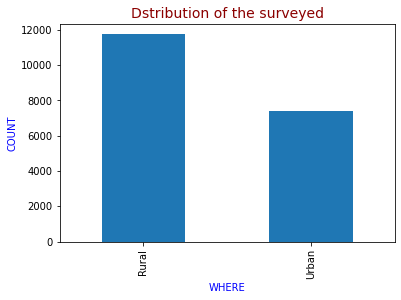

In [155]:
# Graphing location of those who participated in the survey
df.type_of_location.value_counts().plot.bar()
plt.title('Dstribution of the surveyed', fontdict=title)
plt.xlabel('WHERE', fontdict=others)
plt.ylabel('COUNT', fontdict=others)

**Findings**

Most of the respondents dwell in the rural area

*cell_phone_access column*

Text(0, 0.5, 'COUNT')

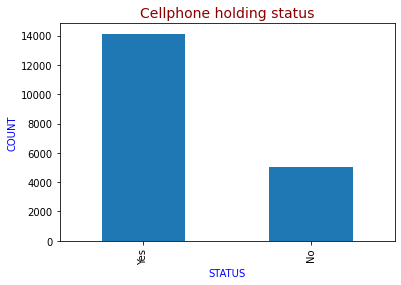

In [156]:
# Cell Phone Access
df.cell_phone_access.value_counts().plot.bar()
plt.title('Cellphone holding status', fontdict=title)
plt.xlabel('STATUS', fontdict=others)
plt.ylabel('COUNT', fontdict=others)

**Findings**:

Most of the repondents own a cellphone.

**Recommendation**

Innovation around the cellphone can ensure a huge number of the population is banked since most own a cell phone.

*household_size column*

In [157]:
# Average household size
df.household_size.mean()

3.742051871993307

In [158]:
# Most frequent family sizes
df.household_size.mode()

0    2.0
dtype: float64

In [159]:
# Median family
df.household_size.median()

3.0

In [160]:
# Range of the families
df.household_size.max() - df.household_size.min()

21.0

In [161]:
# Quartiles for the household sizes
df.household_size.quantile([0.25,0.5,0.75])

0.25    2.0
0.50    3.0
0.75    5.0
Name: household_size, dtype: float64

Text(0, 0.5, 'Value')

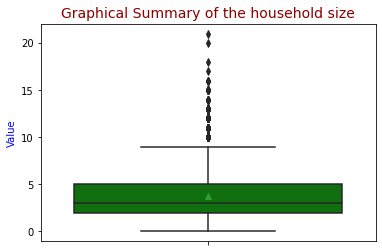

In [162]:
# Visualizing the above measures
sns.boxplot(df.household_size, showmeans=True, color='green', orient='v')
plt.title('Graphical Summary of the household size', fontdict=title)
plt.ylabel('Value', fontdict=others)

In [163]:
# Dispersion of the households
# Variance
df.household_size.var()

5.564008883780614

In [164]:
# The standard deviation
df.household_size.std()

2.358815144045971

In [165]:
# The skewness of the data
df.household_size.skew()

0.9728862654919496

In [166]:
# Kurtosis
df.household_size.kurt()

1.1276040083745413

Text(0, 0.5, 'Proportion')

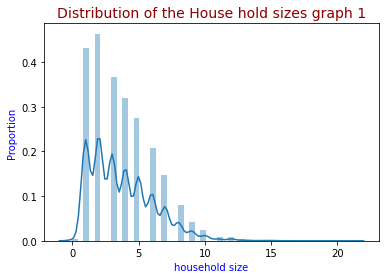

In [167]:
# Visualizing the household data
sns.distplot(df.household_size)
plt.title('Distribution of the House hold sizes graph 1', fontdict=title)
plt.xlabel('household size', fontdict=others)
plt.ylabel('Proportion', fontdict=others)

Text(0, 0.5, 'Count')

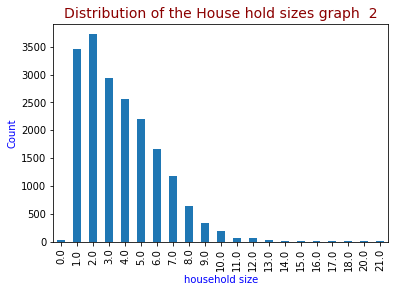

In [168]:
df['household_size'].value_counts().sort_index().plot.bar()
plt.title('Distribution of the House hold sizes graph  2', fontdict=title)
plt.xlabel('household size', fontdict=others)
plt.ylabel('Count', fontdict=others)

**Findings**

1. The household size data is positively skewed
2. There are outliers in the data
3. The average household size is 3.6 
4. The most common family size is 2

*respondent_age column*

In [169]:
# Average age
df.respondent_age.mean()

39.52631028350246

In [170]:
# Most common age of the surveyed
df.respondent_age.mode()

0    30.0
dtype: float64

In [171]:
# Median age
df.respondent_age.median()

36.0

In [172]:
# Range of the ages
df.respondent_age.max() - df.respondent_age.min()

84.0

In [173]:
# Quartiles distribution for the ages
df.respondent_age.quantile([0.25,0.5,0.75])

0.25    26.0
0.50    36.0
0.75    50.0
Name: respondent_age, dtype: float64

Text(0, 0.5, 'age')

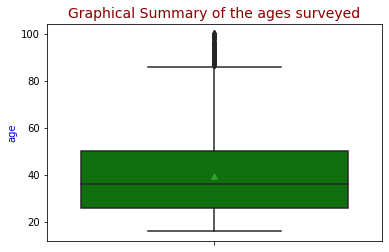

In [174]:
# Visualizing the above measures
# This will also show presence of outliers
sns.boxplot(df.respondent_age, showmeans=True, color='green', orient='v')
plt.title('Graphical Summary of the ages surveyed', fontdict=title)
plt.ylabel('age', fontdict=others)

In [175]:
# Dispersion of the ages
# Variance
df.respondent_age.var()

291.24445603011225

In [176]:
# The standard deviation
df.respondent_age.std()

17.06588573822385

In [177]:
# The skewness of the data
df.respondent_age.skew()

0.7693098219418919

In [178]:
# Kurtosis
df.respondent_age.kurt()

-0.09230025474440495

Text(0, 0.5, 'Proportion')

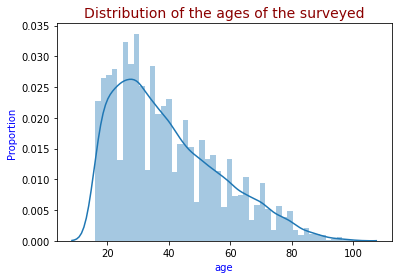

In [179]:
# Visualizing the distribution of the ages
sns.distplot(df.respondent_age)
plt.title('Distribution of the ages of the surveyed', fontdict=title)
plt.xlabel('age', fontdict=others)
plt.ylabel('Proportion', fontdict=others)

Text(0, 0.5, 'Count')

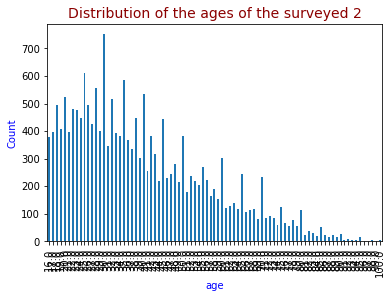

In [180]:
df['respondent_age'].value_counts().sort_index().plot.bar()
plt.title('Distribution of the ages of the surveyed 2', fontdict=title)
plt.xlabel('age', fontdict=others)
plt.ylabel('Count', fontdict=others)

**Findings:**

1. The average age of the respondents was 38
2. Most of the respondents were aged 30
3. There is a great variability in the data with the youngest aged 16 and the oldest being aged 100
4. The age data is positively skewed
5. The median age is 35 
6. There are outliers in the data

**Recommendation:**

With the data being positively skewed the median would be a better measure of central tendency than the mean

*gender_of_respondent column*

In [181]:
df.gender_of_respondent.value_counts()

Female    11381
Male       7737
Name: gender_of_respondent, dtype: int64

Text(0, 0.5, 'COUNT')

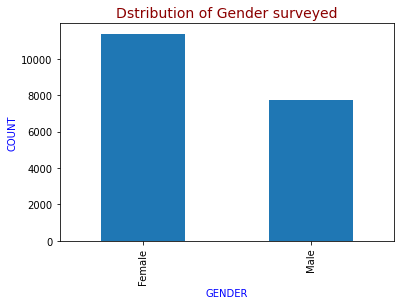

In [182]:
# Graphing gender of those who participated in the survey
df.gender_of_respondent.value_counts().plot.bar()
plt.title('Dstribution of Gender surveyed', fontdict=title)
plt.xlabel('GENDER', fontdict=others)
plt.ylabel('COUNT', fontdict=others)

Findings

Most of the repondents were female

*the_relationship_with_the_head column*

In [183]:
df.the_relathip_with_head.value_counts()

Head of Household      10634
Spouse                  4739
Child                   1910
Parent                  1022
Other relative           656
Other non-relatives      187
Name: the_relathip_with_head, dtype: int64

Text(0, 0.5, 'COUNT')

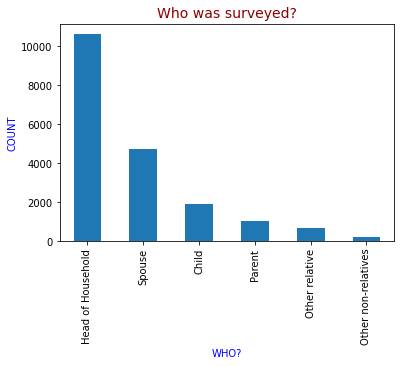

In [184]:
# Visualizing who was surveyed
df.the_relathip_with_head.value_counts().plot.bar()
plt.title('Who was surveyed?', fontdict=title)
plt.xlabel('WHO?', fontdict=others)
plt.ylabel('COUNT', fontdict=others)

Findings

Most of those who participated in the survey were heads of household

*marital_status column*

In [185]:
df.marital_status.value_counts()

Married/Living together    8683
Single/Never Married       6071
Widowed                    2405
Divorced/Seperated         1954
Dont know                     8
Name: marital_status, dtype: int64

Text(0, 0.5, 'COUNT')

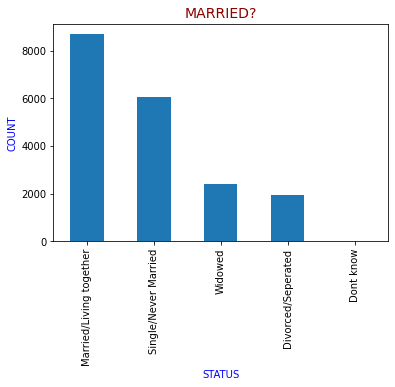

In [186]:
# Graphing marital status of those who participated in the survey
df.marital_status.value_counts().plot.bar()
plt.title('MARRIED?', fontdict=title)
plt.xlabel('STATUS', fontdict=others)
plt.ylabel('COUNT', fontdict=others)

Finding:

Most of those who took part in the survey are married

*level_of_education column*

In [187]:
df.level_of_educuation.value_counts()

Primary education                  9493
No formal education                3907
Secondary education                3825
Tertiary education                 1085
Vocational/Specialised training     779
6                                    26
Other/Dont know/RTA                   8
Name: level_of_educuation, dtype: int64

**Assumption**

Summary of the above information shows that 27 people have 6 as the level of education. Most likely these went to school till primary six and so these will be replaced as Primary education

In [188]:
# Replacing of the 6
df['level_of_educuation'] = df['level_of_educuation'].replace(['6'],['Primary education'])

In [189]:
# New summary
df.level_of_educuation.value_counts()

Primary education                  9519
No formal education                3907
Secondary education                3825
Tertiary education                 1085
Vocational/Specialised training     779
Other/Dont know/RTA                   8
Name: level_of_educuation, dtype: int64

Text(0, 0.5, 'Count')

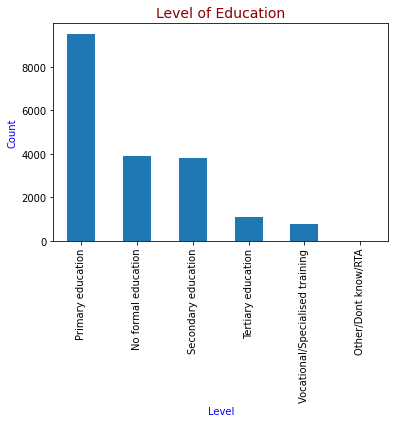

In [190]:
# Visualizing the groupings
# Graphing level of education of those who participated in the survey
df.level_of_educuation.value_counts().plot.bar()
plt.title('Level of Education', fontdict=title)
plt.xlabel('Level', fontdict=others)
plt.ylabel('Count', fontdict=others)

The following are realised:

1. Most of the respondents possess primary education

2. Almost half of the population never went past primary education with a third of this population having no formal education.

*type_of_job column*

In [191]:
df.type_of_job.value_counts()

Self employed                   4885
Informally employed             4538
Farming and Fishing             4099
Remittance Dependent            2228
Other Income                    1050
Formally employed Private       1003
No Income                        574
Formally employed Government     378
Government Dependent             241
Dont Know/Refuse to answer       126
Name: type_of_job, dtype: int64

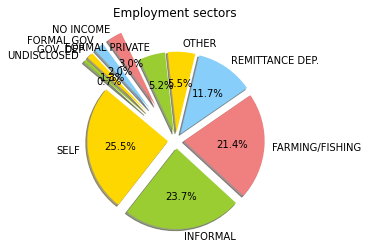

In [192]:
# Visualizing the counts using a pie chart
x = list(df.type_of_job.value_counts())
labels = ['SELF','INFORMAL','FARMING/FISHING','REMITTANCE DEP.', 'OTHER','FORMAL PRIVATE',
          'NO INCOME','FORMAL GOV','GOV. DEP', 'UNDISCLOSED']
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.5, 0.5, 0.5, 0.5)
plt.pie(x, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('Employment sectors')
plt.show()

**From above the following is realised**

1. Most of the respondents are in one way or anothe from the informal sector encoded as either "informal", "farming/fishing" or "self" (self employed). There is a high likelihood that most of these are the unbanked.

2. Formal sector employs very few of the respondents

**BIVARIATE ANALYSIS**

The data available can be categorised as follows:

1. **Categorical** - country, year, has_a_bank_account, type_of_location, cell_phone_access, gender_of_respondent, the_relationship_with_head, marital_status, level_of_education, type_of_job

2. **Numerical** - household_size, repondent_age

Condicting bivariate analysis on the numerical data

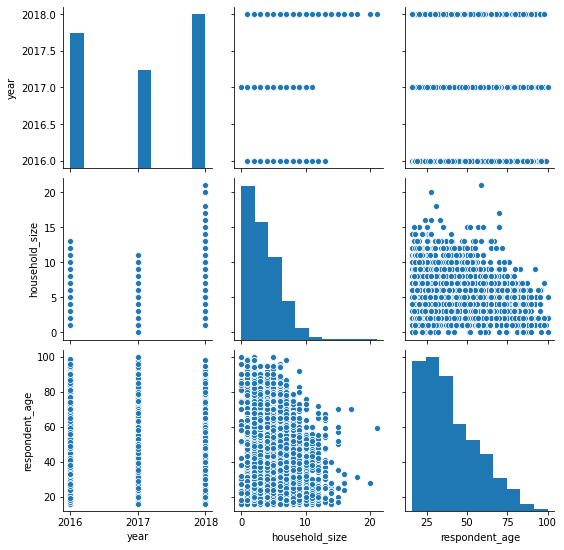

In [193]:
# Ploting the bivariate summaries and recording our observations
sns.pairplot(df)
plt.show()

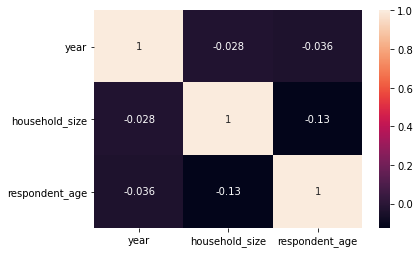

In [194]:
x = df[['year','household_size','respondent_age']]
sns.heatmap(x.corr(),annot=True)
plt.show()

There is not any linear data in the plotted data above

The correlation coeffiecient above indicates that there is weak, very weak negative correlation between the variables.

**Notwithstanding, that is not the focuss of this analysis**

**Chi-square test**

In [195]:
# Computing the observed values cross table
contingency_table = pd.crosstab(df.has_a_bank_account, df.type_of_location)
contingency_table

type_of_location,Rural,Urban
has_a_bank_account,,
No,10145,5819
Yes,1588,1556


In [196]:
# Extracting the values array
Observed_Values = contingency_table.values
Observed_Values

array([[10145,  5819],
       [ 1588,  1556]])

In [197]:
# Computing expected values
b = scipy.stats.chi2_contingency(contingency_table)
Expected_Values = b[3]
Expected_Values

array([[9802.47079757, 6161.52920243],
       [1930.52920243, 1213.47079757]])

In [198]:
# Degrees of Freedom
no_of_rows = len(contingency_table.iloc[0:2,0])
no_of_columns = len(contingency_table.iloc[0,0:2])
deg_free = (no_of_rows-1)*(no_of_columns-1)
deg_free

1

In [72]:
# Setting the significance level at 5%
alpha=0.05

In [199]:
# chi-square statistic - χ2
from scipy.stats import chi2
chi_square = sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic = chi_square[0] + chi_square[1]
chi_square_statistic

188.47144169089034

In [200]:
# Critical_value
critical_value = chi2.ppf(q=1-alpha,df=deg_free)
print('critical_value:',critical_value)

critical_value: 3.841458820694124


In [201]:
# p-value
p_value = 1 - chi2.cdf(x = chi_square_statistic,df = deg_free)
p_value

0.0

In [202]:
# Computing the observed values cross table
contingency_table = pd.crosstab(df.has_a_bank_account, df.level_of_educuation)
Observed_Values = contingency_table.values

# Computing expected values
b = scipy.stats.chi2_contingency(contingency_table)
Expected_Values = b[3]

# Degrees of Freedom
no_of_rows = len(contingency_table.iloc[0:2,0])
no_of_columns = len(contingency_table.iloc[0,0:2])
deg_free = (no_of_rows-1)*(no_of_columns-1)

# Setting the significance level at 5%
alpha=0.05

# chi-square statistic - χ2
from scipy.stats import chi2
chi_square = sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic = chi_square[0] + chi_square[1]

# Critical_value
critical_value = chi2.ppf(q=1-alpha,df=deg_free)

# p-value
p_value = 1- scipy.stats.chi2.cdf(x = chi_square_statistic,df = deg_free)

# p_value = 1 - stats.chi2.cdf(x=chi_squared_stat,  # Find the p-value
#                              df=4)

print('Significance level: ',alpha)
print('Degree of Freedom: ',deg_free)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value:',p_value)

Significance level:  0.05
Degree of Freedom:  1
chi-square statistic: 426.3912258858543
critical_value: 3.841458820694124
p-value: 0.0


**Using crosstabs to view bivariate combinations frequencies and visualizing the same**

In [203]:
# "has_a_bank_account" vs "Location"
pd.crosstab(df.has_a_bank_account, df.type_of_location, margins=True, margins_name="Total")

type_of_location,Rural,Urban,Total
has_a_bank_account,,,
No,10145,5819,15964
Yes,1588,1556,3144
Total,11733,7375,19108


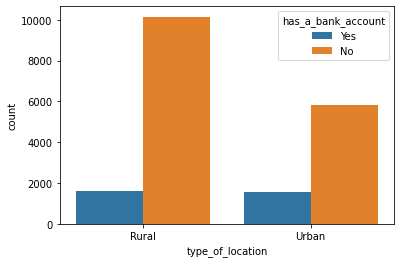

In [204]:
# Visualising
sns.countplot("type_of_location", hue="has_a_bank_account", data = df)
plt.show()

In [205]:
# "has_a_bank_account" vs "cell_phone_access"
pd.crosstab(df.has_a_bank_account, df.cell_phone_access, margins=True, margins_name="Total")

cell_phone_access,No,Yes,Total
has_a_bank_account,,,
No,4894,11074,15968
Yes,103,3041,3144
Total,4997,14115,19112


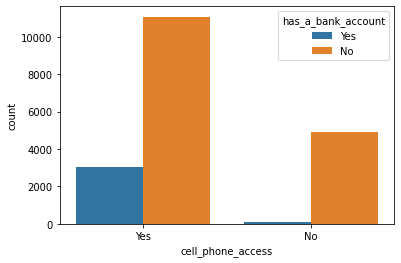

In [206]:
# Visualising "has_a_bank_account" vs "cell_phone_access"
sns.countplot("cell_phone_access", hue="has_a_bank_account", data = df)
plt.show()

In [207]:
# "has_a_bank_account" vs "gender_of_respondent"
pd.crosstab(df.has_a_bank_account, df.gender_of_respondent, margins=True, margins_name="Total")

gender_of_respondent,Female,Male,Total
has_a_bank_account,,,
No,9927,6015,15942
Yes,1433,1707,3140
Total,11360,7722,19082


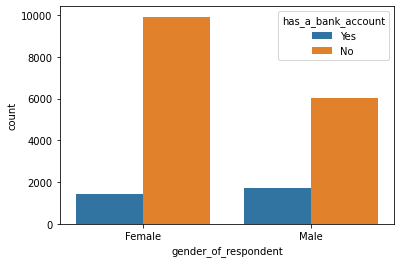

In [208]:
# Visualising "has_a_bank_account" vs "gender_of_respondent"
sns.countplot("gender_of_respondent", hue="has_a_bank_account", data = df)
plt.show()

In [209]:
# "has_a_bank_account" vs "the_relationship_with_head"
pd.crosstab(df.has_a_bank_account, df.the_relathip_with_head, margins=True, margins_name="Total")

the_relathip_with_head,Child,Head of Household,Other non-relatives,Other relative,Parent,Spouse,Total
has_a_bank_account,,,,,,,
No,1717,8476,166,589,953,4067,15968
Yes,192,2141,20,65,65,661,3144
Total,1909,10617,186,654,1018,4728,19112


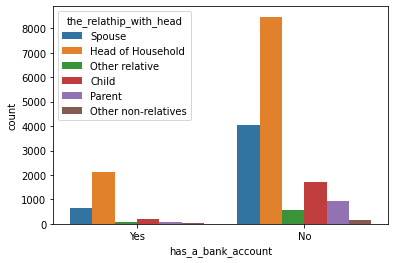

In [210]:
# Visualising "has_a_bank_account" vs "the_relationship_with_head"
sns.countplot("has_a_bank_account", hue="the_relathip_with_head",data = df)
plt.show()

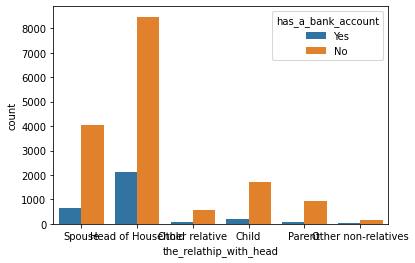

In [211]:
# Plot 2
sns.countplot("the_relathip_with_head", hue="has_a_bank_account", data = df)
plt.show()

In [212]:
# "has_a_bank_account" vs "marital_status"
pd.crosstab(df.has_a_bank_account, df.marital_status, margins=True, margins_name="Total")

marital_status,Divorced/Seperated,Dont know,Married/Living together,Single/Never Married,Widowed,Total
has_a_bank_account,,,,,,
No,1724,6,6907,5147,2159,15943
Yes,226,2,1772,899,243,3142
Total,1950,8,8679,6046,2402,19085


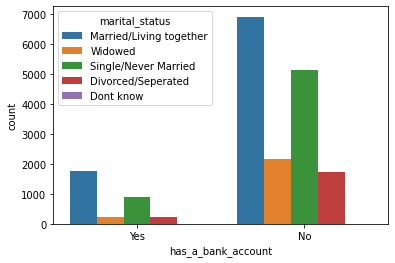

In [213]:
# Visualising "has_a_bank_account" vs "marital_status"
sns.countplot("has_a_bank_account", hue="marital_status",data = df)
plt.show()

In [214]:
# "has_a_bank_account" vs "level_of_education"
pd.crosstab(df.has_a_bank_account, df.level_of_educuation, margins=True, margins_name="Total")

level_of_educuation,No formal education,Other/Dont know/RTA,Primary education,Secondary education,Tertiary education,Vocational/Specialised training,Total
has_a_bank_account,,,,,,,
No,3724,2,8457,2898,525,339,15945
Yes,175,6,1040,923,558,440,3142
Total,3899,8,9497,3821,1083,779,19087


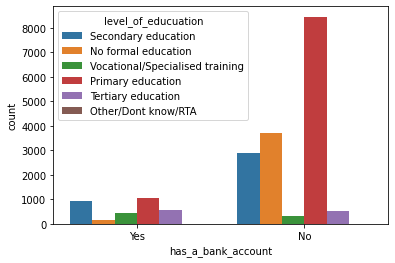

In [215]:
# Visualising "has_a_bank_account" vs "level_of_education"
sns.countplot("has_a_bank_account", hue="level_of_educuation",data = df)
plt.show()

**Findings**

1. Both rural and urban pupulation might be equally banked. Both have low numbers for the banked people

2. Access of phone increases the chances of one being banked

3. The male gender is more banked than the female gender.

4. The head of the household is more likely to own a bank account

5. The higher the level of education the more likely one is likely to have a bank account

**MULTIVARIATE ANALYSIS**


In [228]:
# Previewing the data once more
df.head()

,country,year,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relathip_with_head,marital_status,level_of_educuation,type_of_job
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [229]:
# Encoding categorical data
cleanup = {
    "has_a_bank_account": {"No": 0, "Yes": 1},
    "type_of_location": {"Rural": 0, "Urban": 1},
    "cell_phone_access": {"No":0,"Yes":1 },
    "gender_of_respondent": {"Female":0, "Male":1 },
    "the_relathip_with_head": {"Spouse":0, "Head of Household":1, 
                                      "Other relative":2, "Child":3, "Parent":4, "Other non-relatives":5},
    "marital_status": {"Married/Living together":0, "Widowed":1, "Single/Never Married":2, 
                              "Divorced/Seperated":3, "Dont know":4},
    "level_of_educuation": {"Secondary education":0, "No formal education":1, "Vocational/Specialised training":2, 
                                   "Primary education":3, "Tertiary education":4, "Other/Dont know/RTA":5},
    "type_of_job": {'Self employed':0, "Government Dependent":1, "Formally employed Private":2, "Informally employed":3, 
                           "Formally employed Government":4, "Farming and Fishing":5,"Remittance Dependent":6, "Other Income":7,
                           "Dont Know/Refuse to answer":8, "No Income":9}
          }
df.replace(cleanup, inplace=True)

df.head()

,country,year,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relathip_with_head,marital_status,level_of_educuation,type_of_job
0,Kenya,2018,1.0,0.0,1.0,3.0,24.0,0.0,0.0,0.0,0,0.0
1,Kenya,2018,0.0,0.0,0.0,5.0,70.0,0.0,1.0,1.0,1,1.0
2,Kenya,2018,1.0,1.0,1.0,5.0,26.0,1.0,2.0,2.0,2,0.0
3,Kenya,2018,0.0,0.0,1.0,5.0,34.0,0.0,1.0,0.0,3,2.0
4,Kenya,2018,0.0,1.0,0.0,8.0,26.0,1.0,3.0,2.0,3,3.0


In [230]:
# Further dropping of columns
df = df.drop(['country','year'], axis=1)

In [231]:
# Removing any null values

df = df[~df.has_a_bank_account.isnull()]
df = df[~df.type_of_location.isnull()]
df = df[~df.cell_phone_access.isnull()]
df = df [~df.household_size.isnull()]
df = df[~df.respondent_age.isnull()]
df = df[~df.gender_of_respondent.isnull()]
df = df[~df.the_relathip_with_head.isnull()]
df = df[~df.marital_status.isnull()]
df = df[~df.level_of_educuation.isnull()]
df = df[~df.type_of_job.isnull()]

In [232]:
# Removing all the 'nan' entries
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23357 entries, 0 to 23523
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   has_a_bank_account      23357 non-null  float64
 1   type_of_location        23357 non-null  float64
 2   cell_phone_access       23357 non-null  float64
 3   household_size          23357 non-null  float64
 4   respondent_age          23357 non-null  float64
 5   gender_of_respondent    23357 non-null  float64
 6   the_relathip_with_head  23357 non-null  float64
 7   marital_status          23357 non-null  float64
 8   level_of_educuation     23357 non-null  object 
 9   type_of_job             23357 non-null  float64
dtypes: float64(9), object(1)
memory usage: 2.0+ MB


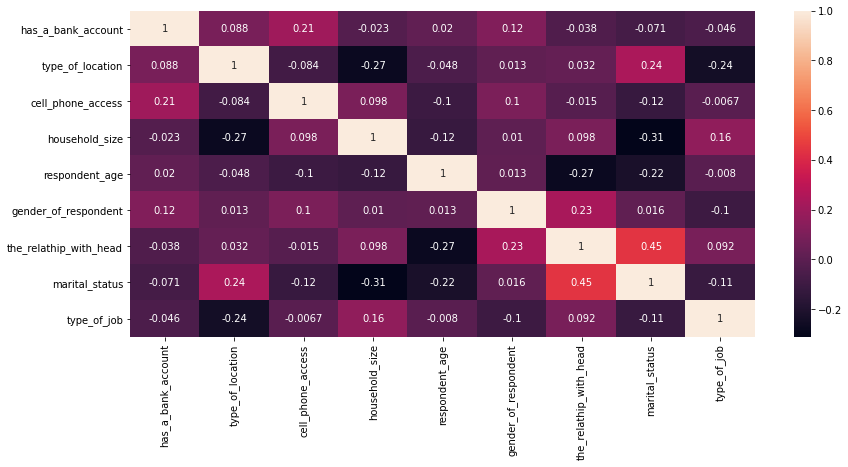

In [233]:
# Let's plot correlation matrix to find out less correlated variable to drop them
cor=df.corr()
plt.figure(figsize=(14,6))
sns.heatmap(cor,annot=True)

In [234]:
# From the correlation matrix we can see that some of the features are not much useful like

# These include: 
#   - household_size
#   - respondent_age
#   - the_relathip_with_head
#   - marital_status
#   - level_of_education
#   - type_of_job
df = df.drop(['household_size', 'respondent_age', 'the_relathip_with_head', 'marital_status', 'level_of_educuation', 'type_of_job'], axis=1)

In [236]:
# Preview of the reducted data
df.head()

,has_a_bank_account,type_of_location,cell_phone_access,gender_of_respondent
0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,1.0
3,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,1.0


Splitting the data

In [237]:
# target vector
y = df['has_a_bank_account']

# dropping as it is not a predictor
df = df.drop('has_a_bank_account', axis = 1)

In [238]:
# scaling the data so as to get rid of any dramatic results during modelling
sc = StandardScaler()

# predictors
X = sc.fit_transform(df)

# Let us now split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)


print("X-Train:",X_train.shape)
print("X-Test:",X_test.shape)
print("Y-Train:",y_train.shape)
print("Y-Test:",y_test.shape)

X-Train: (16349, 3)
X-Test: (7008, 3)
Y-Train: (16349,)
Y-Test: (7008,)



**Model Prediction**

Problem: Predict who is likely to open a bank account

In [243]:
# creating our model instance
log_reg = sk.LogisticRegression()

# fitting the model
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [245]:
# predicting the target vectors

y_pred=log_reg.predict(X_test)

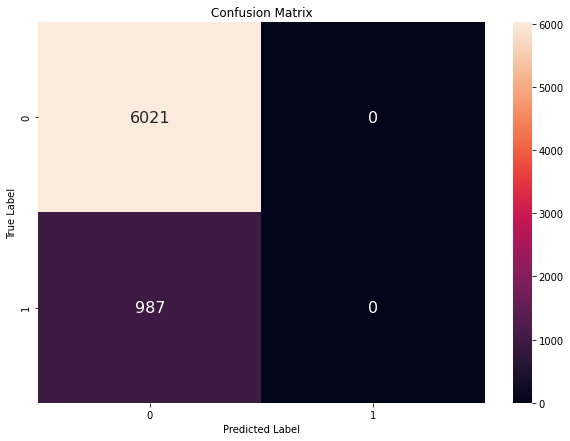

In [249]:
# # creating confusion matrix heatmap

conf_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred))
fig = plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 16}, fmt='g')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [252]:
# getting precision, recall and f1-score via classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.86      1.00      0.92      6021
         1.0       0.00      0.00      0.00       987

    accuracy                           0.86      7008
   macro avg       0.43      0.50      0.46      7008
weighted avg       0.74      0.86      0.79      7008



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [256]:
# accuracy

accuracy = accuracy_score(y_pred, y_test)

print(f"Accuracy: {np.round(accuracy, 3)*100.0}%")

Accuracy: 85.9%


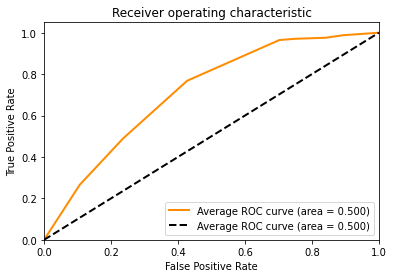

In [264]:
# plotting the ROC curve

auc_roc = roc_auc_score(y_test, log_reg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(X_test)[:,1])

plt.plot(fpr, tpr, color='darkorange', lw=2, 
         label='Average ROC curve (area = {0:0.3f})'.format(auc_roc))
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--', 
         label= 'Average ROC curve (area = 0.500)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()